# **Problem Statement**
Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

In [1140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1141]:
data = pd.read_csv("netflix.csv")

In [1142]:
data.shape

(8807, 12)

In [1143]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [1144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [1145]:
df = data.drop('description', axis=1)

In [1146]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
dtype: int64

## Analysis

### Movie vs TV Show

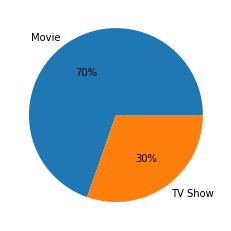

In [1147]:
plt.pie(df['type'].value_counts(), labels=df['type'].unique(), autopct='%0.0f%%')
plt.show()

70% of the total content are movies. TV shows takes only 30% of the total share

In [1148]:
df_new = df[df['release_year'] >= 2010]
df_new = df_new.groupby(['release_year', 'type']).show_id.count().to_frame().reset_index()
df_new.rename(columns={'show_id':'count'}, inplace=True)
df_new.tail(8)

,release_year,type,count
16,2018,Movie,767
17,2018,TV Show,380
18,2019,Movie,633
19,2019,TV Show,397
20,2020,Movie,517
21,2020,TV Show,436
22,2021,Movie,277
23,2021,TV Show,315


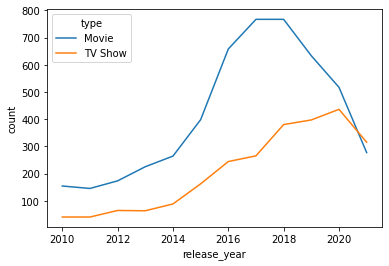

In [1149]:
sns.lineplot(data=df_new, x='release_year', y='count', hue='type')
plt.autoscale()
plt.savefig('img')
plt.show()

Both the number of movies and TV Shows were showing a raising trend until 2018 and the number of movies released hit an all time high of 767 movies per year in the year 2017 and 2018 followed by a drop to 277 in the year 2021 whereas the number of TV shows continued to increase and peaked at 436 in 2020 eventually surpassing the number of movies/year in 2021.

### 10 most popular directors

In [1150]:
df_dir = df[~df['director'].isna()]
directors = df_dir['director'].apply(lambda x: str(x).split(', ')).to_list()
df_dir = pd.DataFrame(directors, index=df_dir['title'])
df_dir = df_dir.stack()
df_dir = pd.DataFrame(df_dir)
df_dir.rename(columns={0:"director"}, inplace=True)

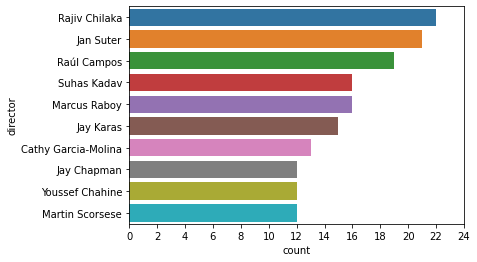

In [1151]:
sns.countplot(data=df_dir, y='director', order=df_dir['director'].value_counts().iloc[0:10].index)
plt.xticks(np.arange(0,25,2))
plt.show()

### 10 most popular movie actors

In [1152]:
df_act = df[~df['cast'].isna()]
df_act = df_act[df_act['type'] == 'Movie']
actors = df_act['cast'].apply(lambda x: str(x).split(', ')).to_list()
df_act = pd.DataFrame(actors, index=df_act['title'])
df_act = df_act.stack()
df_act = pd.DataFrame(df_act)

df_act.rename(columns={0:"actors"}, inplace=True)

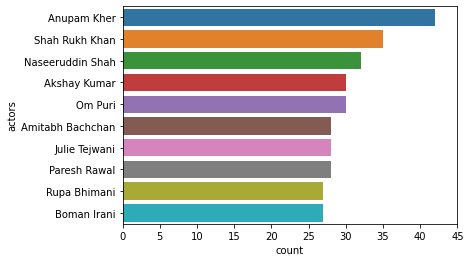

In [1153]:
sns.countplot(data=df_act, y='actors', order=df_act['actors'].value_counts().sort_values(ascending=False).iloc[0:10].index)
plt.xticks(np.arange(0,50,5))

plt.show()

### 10 most popular TV Show actors/Performers

In [1154]:
df_per = df[~df['cast'].isna()]
df_per = df_per[df_per['type'] == 'TV Show']
actors = df_per['cast'].apply(lambda x: str(x).split(', ')).to_list()
df_per = pd.DataFrame(actors, index=df_per['title'])
df_per = df_per.stack()
df_per = pd.DataFrame(df_per)
df_per.rename(columns={0:"actors"}, inplace=True)

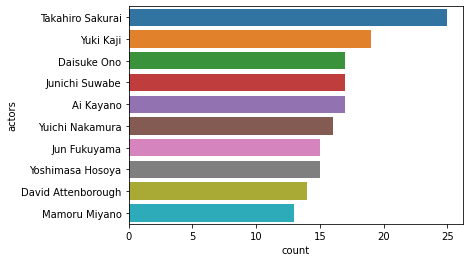

In [1155]:
sns.countplot(data=df_per, y='actors', order=df_per['actors'].value_counts().iloc[0:10].index)
plt.xticks(np.arange(0,30,5))
plt.show()

### Country

In [1156]:
df_ctry = df[~df['country'].isna()]
country = df_ctry['country'].apply(lambda x: str(x).split(', ')).to_list()
df_ctry = pd.DataFrame(country, index=df_ctry['title'])
df_ctry = df_ctry.stack()
df_ctry = pd.DataFrame(df_ctry)
df_ctry.rename(columns={0:"country"}, inplace=True)

In [1157]:
df_cntry_percent = df_ctry['country'].value_counts()/88.07
df_cntry_percent = df_cntry_percent.to_frame().reset_index().rename(columns={'index':'country', 'country':'percentage'})
df_cntry_percent['percentage'] = df_cntry_percent['percentage'].round(0).astype('int')
df_cntry_percent.head()

,country,percentage
0,United States,42
1,India,12
2,United Kingdom,9
3,Canada,5
4,France,4


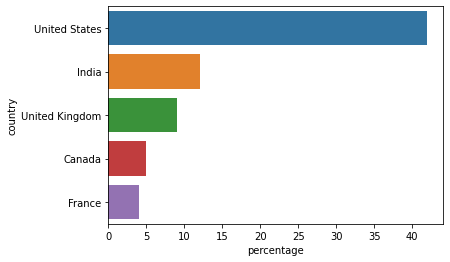

In [1158]:
sns.barplot(data=df_cntry_percent.iloc[0:5], y='country', x='percentage')
plt.savefig("country_wise", bbox_inches = "tight")
plt.show()

Almost half(42%) of the total content are available in US whereas India at second position has only 12 percent of the total content indicates that the majority of the content in netflix is targeted to the audience in US market

### Date added - TV shows

In [1159]:
df_dtadded = df[~df['date_added'].isna()]
df_dtadded = df_dtadded[df_dtadded['type'] == 'TV Show']
dt_added = df_dtadded['date_added'].to_list()
df_dtadded = pd.DataFrame(dt_added, index=df_dtadded['title'])
df_dtadded.rename(columns={0:"date_added"}, inplace=True)
df_dtadded['date_added'] = df_dtadded['date_added'].astype('datetime64')

In [1160]:
df_dtadded['year'] = df_dtadded['date_added'].dt.year
df_dtadded['month'] = df_dtadded['date_added'].dt.month_name()
df_dtadded['day'] = df_dtadded['date_added'].dt.day
df_dtadded['week'] = df_dtadded['date_added'].dt.weekday
df_dtadded['week'].replace([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednedsay', 'Thursday', 'Friday', 'Saturday', 'Sunday'], inplace=True)

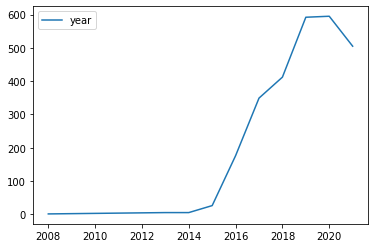

In [1161]:
sns.lineplot(data=df_dtadded['year'].value_counts().to_frame())
plt.show()

A steep increase can be observed in terms of the TV shows added to the platform post the year 2015 followed by a small decrease in 2020

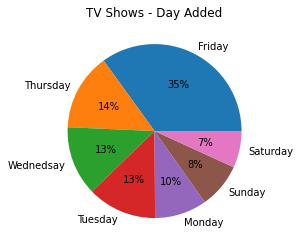

In [1162]:
plt.pie(df_dtadded['week'].value_counts(), labels=df_dtadded['week'].unique(), autopct='%0.0f%%')
plt.title("TV Shows - Day Added")
plt.savefig("show_Added")
plt.show()

35% of the TV shows are added to netflix on Fridays

### Release Year

#### Movie

In [1163]:
df_rymovie = df[df['type']=='Movie']
df_rymovie.describe()

,release_year
count,6131.000000
mean,2013.121514
std,9.678169
min,1942.000000
25%,2012.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


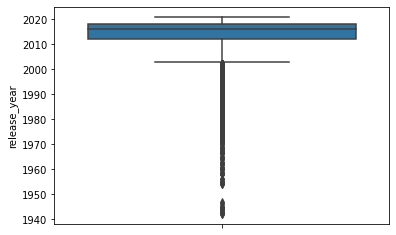

In [1164]:
sns.boxplot(data=df_rymovie, y='release_year')
plt.show()

75% of the movies in netflix has a release year >= 2012

#### TV Show

In [1165]:
df_ryshow = df[df['type']=='TV Show']
df_ryshow.describe()

,release_year
count,2676.000000
mean,2016.605755
std,5.740138
min,1925.000000
25%,2016.000000
50%,2018.000000
75%,2020.000000
max,2021.000000


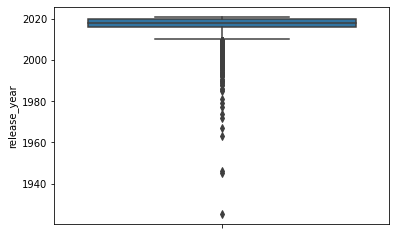

In [1166]:
sns.boxplot(data=df_ryshow, y='release_year')
plt.show()

#### 75% of the TV Shows in netflix has a release year >= 2016

### Rating

In [1167]:
ratings = df.groupby(['rating']).size().reset_index(name='count')
ratings.drop([0, 1, 2], inplace=True)
ratings.sort_values(by='count', ascending=False, inplace=True)
ratings.reset_index(inplace=True)
ratings.drop('index', axis=1, inplace=True)

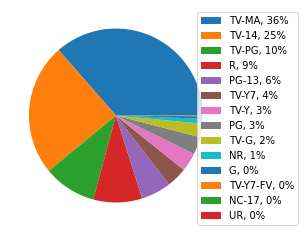

In [1168]:
plt.pie(ratings['count'])
labels = ratings['rating']
sizes = ratings['count']/88.07
labels = [f'{l}, {s:0.0f}%' for l, s in zip(labels, sizes)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.savefig("rating")
plt.show()

60% of the content are rated either TV-MA or TV-14

### Duration

#### Movie

In [1169]:
df_dur = df[~df['duration'].isna()]
movie_dur = df_dur[df_dur['type'] == 'Movie']['duration'].to_frame()

In [1170]:
movie_dur['duration'] = movie_dur['duration'].apply(lambda x: str(x).split(' ')[0])
movie_dur['duration'] = movie_dur['duration'].astype('int')

In [1171]:
movie_dur.describe()

,duration
count,6128.000000
mean,99.577187
std,28.290593
min,3.000000
25%,87.000000
50%,98.000000
75%,114.000000
max,312.000000


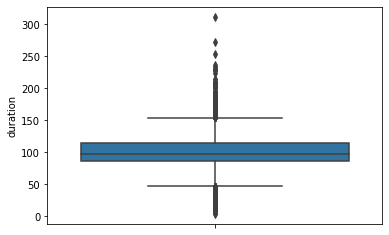

In [1172]:
sns.boxplot(data=movie_dur, y='duration')
plt.savefig('movie_duration')
plt.show()

50% of the movies have a duration between 87-114 minutes. Median duration is found to be 98min for a movie

#### TV Show

In [1173]:
show_dur = df_dur[df_dur['type'] == 'TV Show']['duration'].to_frame()
show_dur['duration'] = show_dur['duration'].apply(lambda x: str(x).split(' ')[0])
show_dur = show_dur.value_counts().to_frame().reset_index().rename(columns={'duration':'seasons', 0: 'count'})
show_dur.loc[15] = ['>5', show_dur.iloc[5:15]['count'].sum()] 
show_dur.drop(np.arange(5,15), inplace=True)

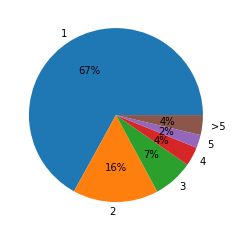

In [1174]:
plt.pie(show_dur['count'], labels=show_dur['seasons'], autopct='%0.0f%%')
plt.show()

67% of the TV Shows have only 1 season and 90% of the shows have a total number of season <= 3

### Genre

In [1175]:
df_genre = df[~df['listed_in'].isna()]
genre = df_genre['listed_in'].apply(lambda x: str(x).split(', ')).to_list()
df_genre = pd.DataFrame(genre, index=df_genre['title'])
df_genre = df_genre.stack()
df_genre = pd.DataFrame(df_genre)
df_genre.rename(columns={0:"genre"}, inplace=True)

In [1176]:
df_genre_pcent = df_genre['genre'].value_counts().to_frame().reset_index().rename(columns={'index':'genre', 'genre':'count'})
df_genre_pcent['percent'] = (df_genre_pcent['count']/88.07).round(0).astype('int')
df_genre_pcent.head()

,genre,count,percent
0,International Movies,2752,31
1,Dramas,2427,28
2,Comedies,1674,19
3,International TV Shows,1351,15
4,Documentaries,869,10


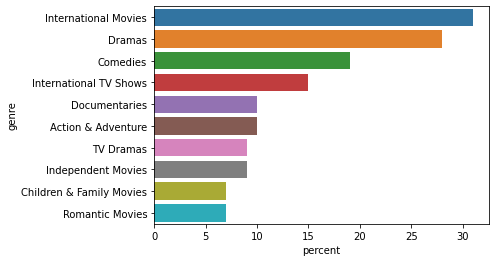

In [1177]:
sns.barplot(data=df_genre_pcent.iloc[0:10], y='genre', x='percent')
plt.show()

Highest classified genre categories are 'International Movies', 'Dramas' and 'Comedies'

#### Movies

In [1178]:
df_genre_movies = df[~df['listed_in'].isna()]
df_genre_movies = df_genre_movies[df_genre_movies['type']=='Movie']
genre = df_genre_movies['listed_in'].apply(lambda x: str(x).split(', ')).to_list()
df_genre_movies = pd.DataFrame(genre, index=df_genre_movies['title'])
df_genre_movies = df_genre_movies.stack()
df_genre_movies = pd.DataFrame(df_genre_movies)
df_genre_movies.rename(columns={0:"genre"}, inplace=True)

In [1179]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [1180]:
df_genre_movie_pcent = df_genre_movies['genre'].value_counts().to_frame().reset_index().rename(columns={'index':'genre', 'genre':'count'})
df_genre_movie_pcent['percent'] = (df_genre_movie_pcent['count']/61.31).round(0).astype('int')

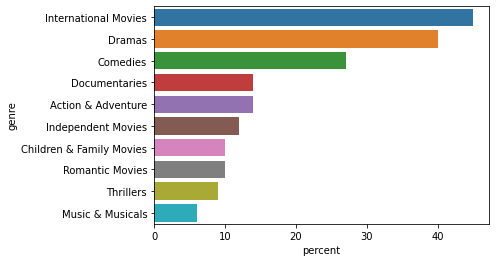

In [1181]:
sns.barplot(data=df_genre_movie_pcent.iloc[0:10], y='genre', x='percent')
plt.show()

#### TV Shows

In [1182]:
df_genre_shows = df[~df['listed_in'].isna()]
df_genre_shows = df_genre_shows[df_genre_shows['type']=='TV Show']
genre = df_genre_shows['listed_in'].apply(lambda x: str(x).split(', ')).to_list()
df_genre_shows = pd.DataFrame(genre, index=df_genre_shows['title'])
df_genre_shows = df_genre_shows.stack()
df_genre_shows = pd.DataFrame(df_genre_shows)
df_genre_shows.rename(columns={0:"genre"}, inplace=True)

In [1183]:
df_genre_shows_pcent = df_genre_shows['genre'].value_counts().to_frame().reset_index().rename(columns={'index':'genre', 'genre':'count'})
df_genre_shows_pcent['percent'] = (df_genre_shows_pcent['count']/26.76).round(0).astype('int')

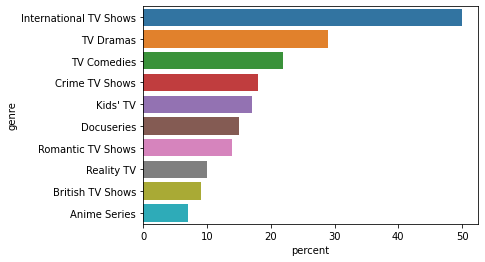

In [1184]:
sns.barplot(data=df_genre_shows_pcent.iloc[0:10], y='genre', x='percent')
plt.show()

### Popular movie actors as per the content released in last 5 years

In [1185]:
df_act_ryear = df_act.reset_index().drop(columns='level_1')
df_act_ryear = pd.merge(df_act_ryear, df, on=['title'])[['title', 'actors', 'release_year', 'type']]
actors_p2015 = df_act_ryear[df_act_ryear['release_year'] >= 2015]
actors_p2015 = actors_p2015[actors_p2015['type'] == 'Movie']

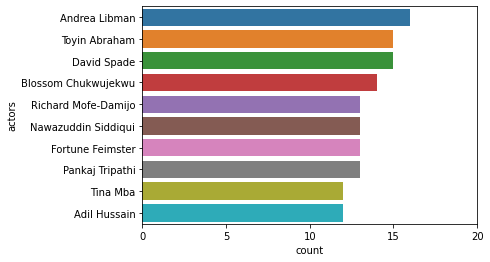

In [1186]:
sns.countplot(data=actors_p2015, y='actors', order=actors_p2015['actors'].value_counts().sort_values(ascending=False).iloc[0:10].index)
plt.xticks(np.arange(0,25,5))
plt.show()

In [1187]:
act = df_act_ryear[df_act_ryear['actors'] == 'Nawazuddin Siddiqui']
act.shape

(20, 4)

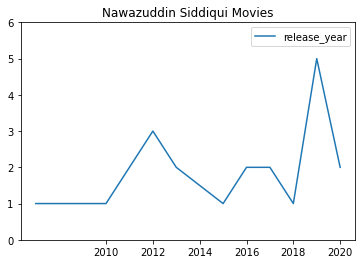

In [1188]:
sns.lineplot(data=act['release_year'].value_counts().to_frame())
plt.title('Nawazuddin Siddiqui Movies')
plt.yticks(np.arange(0, 7, 1))
plt.xticks(np.arange(2010, 2022, 2))
plt.savefig("nawaz")
plt.show()

Nawazuddin Siddiqui has acted in over 20 movies from the year 2015